# TINA Djara Olivier

# Atelier 5 : Topic Mining


L'objectif de cet atelier est de decouvrire le "Topic Mining" à travers un dataset de news. Le dataset comprend 18846 posts appartenant à 20 topics differents et qui sont reparties en deux groupes: un dataset d'apprentissage et un dataset de test.

# 1. Praitraitements / NLP

## 1.1 Recuperration du corpus

In [1]:
from sklearn.datasets import fetch_20newsgroups
#fetch return a brunch that is a dictionary-like object, with the following attributes.
dataset = fetch_20newsgroups(subset='train')
data=dataset.data
targets=dataset.target
print(dataset.target_names)
print(data[3],targets[0])

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
From: jgreen@amber (Joe Green)
Subject: Re: Weitek P9000 ?
Organization: Harris Computer Systems Division
Lines: 14
Distribution: world
NNTP-Posting-Host: amber.ssd.csd.harris.com
X-Newsreader: TIN [version 1.1 PL9]

Robert J.C. Kyanko (rob@rjck.UUCP) wrote:
> abraxis@iastate.edu writes in article <abraxis.734340159@class1.iastate.edu>:
> > Anyone know about the Weitek P9000 graphics chip?
> As far as the low-level stuff goes, it looks pretty nice.  It's got this
> quadrilateral fill command that requires just the four points.

Do you have Weitek's address/phone number?  I'd like to get some informa

## 1.2 Cleaning

Le corpus comporte des posts qui necessitent un cleaning afin de ne garder que les donnees qui vont nous servir dans l'opération du topic mining.
   * supprimer les emails
   * supprimer les adresses des sites web
   * supprimer les nombres et les caractères spéciaux
   * supprimer les stopwords(on la reporte vers l'étape de vectorisation)
   * supprimer les terms non sigificatifs (non anglais )
   
  Utiliser la librairie RE pour la manipulation des expressions regulière

In [2]:
'''
.           Wildcard, matches any character
^abc	    Matches some pattern abc at the start of a string
abc$	    Matches some pattern abc at the end of a string
[abc]	    Matches one of a set of characters
[A-Z0-9]	Matches one of a range of characters
ed|ing|s	Matches one of the specified strings (disjunction)
*	        Zero or more of previous item, e.g. a*, [a-z]* (also known as Kleene Closure)
+	        One or more of previous item, e.g. a+, [a-z]+
?	        Zero or one of the previous item (i.e. optional), e.g. a?, [a-z]?
{n}	        Exactly n repeats where n is a non-negative integer
{n,}	    At least n repeats
{,n}	    No more than n repeats
{m,n}	    At least m and no more than n repeats
a(b|c)+	    Parentheses that indicate the scope of the operators
'''


'''
\number
Correspond au contenu du groupe du même nombre. Les groupes sont numérotés à partir de 1. Par exemple, (.+) \1 correspond à 'the the' ou '55 55', mais pas à 'thethe' (notez l’espace après le groupe). Cette séquence spéciale ne peut être utilisée que pour faire référence aux 99 premiers groupes. Si le premier chiffre de number est 0, ou si number est un nombre octal de 3 chiffres, il ne sera pas interprété comme une référence à un groupe, mais comme le caractère à la valeur octale number. À l’intérieur des '[' et ']' d’une classe de caractères, tous les échappements numériques sont traités comme des caractères.

\A
Correspond uniquement au début d’une chaîne de caractères.

\b
Correspond à la chaîne vide, mais uniquement au début ou à la fin d’un mot. Un mot est défini comme une séquence de « caractères de mots ». Notez que formellement, \b est défini comme la liaison entre \w et \W (et inversement), ou entre \w et le début/fin d’un mot. Cela signifie que r'\bfoo\b' validera 'foo', 'foo.', '(foo)' ou 'bar foo baz' mais pas 'foobar' ou 'foo3'.

Les caractères alphanumériques Unicode sont utilisés par défaut dans les motifs Unicode, mais cela peut être changé en utilisant l’option ASCII. Les délimitations de mots sont déterminées par la locale si l’option LOCALE est utilisée. À l’intérieur d’un intervalle de caractères, \b représente le caractère backspace, par compatibilité avec les chaînes littérales Python.

\B
Correspond à la chaîne vide, mais uniquement quand elle n’est pas au début ou à la fin d’un mot. Cela signifie que r'py\B' valide 'python', 'py3' ou 'py2', mais pas 'py', 'py.' ou 'py!'. \B est simplement l’opposé de \b, donc les caractères de mots dans les motifs Unicode sont les alphanumériques et tirets bas Unicode, bien que cela puisse être changé avec l’option ASCII. Les délimitations de mots sont déterminées par la locale si l’option LOCALE est utilisée.

\d
Pour les motifs Unicode (str) :
Valide n’importe quel chiffre décimal Unicode (soit tout caractère Unicode de catégorie [Nd]). Cela inclue [0-9], mais aussi bien d’autres caractères de chiffres. Si l’option ASCII est utilisée, seuls les caractères de la classe [0-9] correspondront (mais l’option affectant l’expression rationnelle entière, il peut être préférable dans ce genre de cas d’utiliser un [0-9] explicite).

Pour les motifs 8-bit (bytes) :
Valide n’importe quel chiffre décimal ; équivalent à [0-9].

\D
Valide tout caractère qui n’est pas un chiffre décimal. C’est l’opposé de \d. Si l’option ASCII est utilisée, cela devient équivalent à [^0-9] (mais l’option affectant l’expression rationnelle entière, il peut être préférable dans ce genre de cas d’utiliser explicitement [^0-9]).

\s
Pour les motifs Unicode (str) :
Valide les caractères d’espacement Unicode (qui incluent [ \t\n\r\f\v] et bien d’autres, comme les espaces insécables requises par les règles typographiques de beaucoup de langues). Si l’option ASCII est utilisée, seuls les caractères de la classe [ \t\n\r\f\v] sont validés (mais l’option affectant l’expression rationnelle entière, il peut être préférable dans ce genre de cas d’utiliser un [ \t\n\r\f\v] explicite).

Pour les motifs 8-bit (bytes) :
Valide les caractères considérés comme des espacements dans la table ASCII ; équivalent à [ \t\n\r\f\v].

\S
Valide tout caractère qui n’est pas un caractère d’espacement. c’est l’opposé de \s. Si l’option ASCII est utilisée, cela devient équivalent à [^ \t\n\r\f\v] (mais l’option affectant l’expression rationnelle entière, il peut être préférable dans ce genre de cas d’utiliser un [^ \t\n\r\f\v] explicite).

\w
Pour les motifs Unicode (str) :
Valide les caractères Unicode de mot ; cela inclut la plupart des caractères qui peuvent être compris dans un mot d’une quelconque langue, aussi bien que les nombres et les tirets bas. Si l’option ASCII est utilisée, seuls les caractères de la classe [a-zA-Z0-9_] sont validés (mais l’option affectant l’expression rationnelle entière, il peut être préférable dans ce genre de cas d’utiliser un [a-zA-Z0-9_] explicite).

Pour les motifs 8-bit (bytes) :
Valide les caractères alphanumériques de la table ASCII ; équivalent à [a-zA-Z0-9_]. Si l’option LOCALE est utilisée, les caractères considérés alphanumériques dans la locale et le tiret bas seront acceptés.

\W
Valide tout caractère qui n’est pas un caractère de mot. C’est l’opposé de \w. Si l’option ASCII est utilisée, cela devient équivalent à [^a-zA-Z0-9_] (mais l’option affectant l’expression rationnelle entière, il peut être préférable dans ce genre de cas d’utiliser un [^a-zA-Z0-9_] explicite). Si l’option LOCALE est utilisée, les caractères considérés alphanumériques dans la locale courrante, et le tiret bas, seront acceptés.

\Z
Correspond uniquement à la fin d’une chaîne de caractères
'''

import re
def cleaninng(doc):
    return re.sub("\S+@\S+|(www\S+)|[0-9]+|[@_!#$%^&*()<>?/\|}{~:]*","", doc)


data= [cleaninng(doc) for doc in data]

import nltk
nltk.download('words')

'''Supprimer les terms non anglais'''
words = set(nltk.corpus.words.words())
def English(doc):
    return " ".join(w for w in nltk.wordpunct_tokenize(doc) if w.lower() in words)

data= [English(doc) for doc in data]
print(data[0],targets[0])

[nltk_data] Downloading package words to /home/olivier/nltk_data...
[nltk_data]   Package words is already up-to-date!


From where s my thing Subject WHAT car is this Posting Host Organization University of College Park I was wondering if anyone out there could enlighten me on this car I saw the other day It was a door sports car to be from the late s early s It was a The were really small In addition the front bumper was separate from the rest of the body This is all I know If anyone can a model name engine specs of production where this car is made history or whatever you have on this funky looking car please e mail Thanks brought to you by your neighborhood 7


## 1.2 Lemmatisation

In [3]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import words

lemmatizer = WordNetLemmatizer()

def lemmatization(doc):
    '''Lemmatization of the document doc'''
    # Tokenize the document into words
    words = word_tokenize(doc)
    
    # Lemmatize each word and remove stop words
    lemmatized_words = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stopwords.words('english')]
    
    # Join the lemmatized words back into a document
    lemmatized_doc = ' '.join(lemmatized_words)
    
    return lemmatized_doc

# Apply lemmatization to the entire corpus
corpus_lemmatized = [lemmatization(doc) for doc in data]
print(corpus_lemmatized[0])


thing subject car posting host organization university college park wondering anyone could enlighten car saw day door sport car late early really small addition front bumper separate rest body know anyone model name engine spec production car made history whatever funky looking car please e mail thanks brought neighborhood


# 2. Approche Mono-Terme

Récupérer la représentation vectorielle des differents documents avec le TF-IDF

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the corpus
vect = vectorizer.fit_transform(corpus_lemmatized)

# Create a DataFrame with the TF-IDF matrix
df_tfidf = pd.DataFrame(vect.toarray(), columns=vectorizer.get_feature_names_out())

# Display the DataFrame
print(df_tfidf)

        aa  aal  aba  abacus  abandon  abandoned  abandonment  abate  \
0      0.0  0.0  0.0     0.0      0.0        0.0          0.0    0.0   
1      0.0  0.0  0.0     0.0      0.0        0.0          0.0    0.0   
2      0.0  0.0  0.0     0.0      0.0        0.0          0.0    0.0   
3      0.0  0.0  0.0     0.0      0.0        0.0          0.0    0.0   
4      0.0  0.0  0.0     0.0      0.0        0.0          0.0    0.0   
...    ...  ...  ...     ...      ...        ...          ...    ...   
11309  0.0  0.0  0.0     0.0      0.0        0.0          0.0    0.0   
11310  0.0  0.0  0.0     0.0      0.0        0.0          0.0    0.0   
11311  0.0  0.0  0.0     0.0      0.0        0.0          0.0    0.0   
11312  0.0  0.0  0.0     0.0      0.0        0.0          0.0    0.0   
11313  0.0  0.0  0.0     0.0      0.0        0.0          0.0    0.0   

       abatement  abbey  ...  zone  zoning  zoo  zooid  zoological  zoology  \
0            0.0    0.0  ...   0.0     0.0  0.0    0.0  

Réaliser une fonction de scoring qui permettra de déterminer les mots les plus pertinents pour être des topics.

In [6]:
import numpy
def scoring(k):
    ''''Proposer un traitement qui retourne la liste  des k termes les plus pertinents'''
    vect=vect.toarray()
    feature_names=vectorizer.get_feature_names()
    scores=[]
    for i in range(0, len(vect[0])):
        s=[vect[j][i] for j in range(len(vect))]
        scores.append(numpy.mean(s))
    topics=[]
    for i in range(k):
        topics.append(feature_names[scores.index(max(scores))])
        feature_names.pop(scores.index(max(scores)))
        scores.pop(scores.index(max(scores)))

    return topics, feature_names,scores


Modifier le code precedent pour identifier les topics similaires (selon un seuil predeterminé) et ne garder que le plus pertinents. chaque terme supprimé doit etre remplacé par le terme suivant dans la liste des scores.
   * Utiliser l'approche semantique lexicale
   * Utiliser l'approche semantiqe statistique: le wordembedding

In [7]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def scoring_v2(k, seuil=0.7):
    topics, feature_names, scores = scoring(k)

    for i in range(0, len(topics) - 1):
        for j in range(i + 1, len(topics)):
            if sim(topics[i], topics[j]) >= seuil:
                topics[j] = feature_names.pop(scores.index(max(scores)))
                scores.pop(scores.index(max(scores)))

    return topics

def sim(t1, t2):
    # Using cosine similarity
    # Assuming t1 and t2 are vectors (e.g., Word2Vec embeddings)
    t1 = np.array(t1).reshape(1, -1)
    t2 = np.array(t2).reshape(1, -1)
    similarity = cosine_similarity(t1, t2)[0, 0]
    return similarity

Calculer la distribution des topics par documents.

In [8]:
def distribution():
    dist = []

    for doc_vector in vectors:
        similarities = [sim(doc_vector, topic_vector) for topic_vector in topic_vectors]
        most_similar_topic = np.argmax(similarities)
        dist.append(most_similar_topic)

    return dist

Essayer d'ameliorer les resultats obtenus en utilisant par exemple un vocabulaire  preetabli ou en ne considerant que les parties significatives du document(Subject, Summary, keywords... )

# 2. LSA


## Vectorisation

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

vectorizer = TfidfVectorizer(stop_words='english')
vect = vectorizer.fit_transform(corpus_lemmatized)
feature_names = vectorizer.get_feature_names_out()

df = pd.DataFrame(vect.toarray(), columns=feature_names)

In [11]:
df.head()

aa  aal  aba  abacus  abandon  abandoned  abandonment  abate  abatement  \
0  0.0  0.0  0.0     0.0      0.0        0.0          0.0    0.0        0.0   
1  0.0  0.0  0.0     0.0      0.0        0.0          0.0    0.0        0.0   
2  0.0  0.0  0.0     0.0      0.0        0.0          0.0    0.0        0.0   
3  0.0  0.0  0.0     0.0      0.0        0.0          0.0    0.0        0.0   
4  0.0  0.0  0.0     0.0      0.0        0.0          0.0    0.0        0.0   

   abbey  ...  zone  zoning  zoo  zooid  zoological  zoology  zoom  zorro  \
0    0.0  ...   0.0     0.0  0.0    0.0         0.0      0.0   0.0    0.0   
1    0.0  ...   0.0     0.0  0.0    0.0         0.0      0.0   0.0    0.0   
2    0.0  ...   0.0     0.0  0.0    0.0         0.0      0.0   0.0    0.0   
3    0.0  ...   0.0     0.0  0.0    0.0         0.0      0.0   0.0    0.0   
4    0.0  ...   0.0     0.0  0.0    0.0         0.0      0.0   0.0    0.0   

   zowie  zucchini  
0    0.0       0.0  
1    0.0       0.0  
2    0.0       0.0  
3    0.0       0.0  
4    0.0       0.0  

[5 rows x 21019 columns]

## Decomposition SVD de notre corpus selon le vocabulaire

In [12]:
from sklearn.decomposition import TruncatedSVD
k=20
lsa= TruncatedSVD(n_components=k)
U = lsa.fit_transform(vect)
D= lsa.singular_values_
V_T = lsa.components_.T

## Visualisation

In [13]:
doc_topic_matrix=pd.DataFrame(data=U, index = [f'Doc_{r}' for r in range(0,U.shape[0])], columns = [f'Topic_{r}' for r in range(0,V_T.shape[1])])
doc_topic_matrix

Topic_0   Topic_1   Topic_2   Topic_3   Topic_4   Topic_5  \
Doc_0      0.162137 -0.031668 -0.074389 -0.061501  0.008178 -0.081696   
Doc_1      0.099621 -0.048427 -0.015901 -0.002069  0.031824 -0.024418   
Doc_2      0.251723 -0.054949 -0.021425  0.027189  0.013387  0.026685   
Doc_3      0.222805 -0.070754  0.073363 -0.048726 -0.050498 -0.050787   
Doc_4      0.123985 -0.000675 -0.003787  0.020047 -0.012977  0.030739   
...             ...       ...       ...       ...       ...       ...   
Doc_11309  0.103614  0.032931 -0.008810 -0.009864  0.005735  0.009472   
Doc_11310  0.180231 -0.171947 -0.042320  0.082760  0.127219 -0.034830   
Doc_11311  0.068642 -0.027656  0.024274  0.002830  0.003184 -0.006772   
Doc_11312  0.117302 -0.017678  0.002295  0.000715 -0.055549  0.004570   
Doc_11313  0.107573 -0.045296  0.020089 -0.036178 -0.027452 -0.046772   

            Topic_6   Topic_7   Topic_8   Topic_9  Topic_10  Topic_11  \
Doc_0     -0.131464  0.060077  0.282885  0.009453 -0.186852  0.046799   
Doc_1      0.001362 -0.015793 -0.004581  0.001930 -0.029462 -0.027502   
Doc_2     -0.011840 -0.011240  0.023460  0.010105 -0.026145  0.033324   
Doc_3      0.047609  0.011951 -0.001262 -0.040277 -0.101757 -0.037344   
Doc_4     -0.023174 -0.021066 -0.013623  0.045919 -0.015150 -0.045201   
...             ...       ...       ...       ...       ...       ...   
Doc_11309 -0.030926  0.007257 -0.000721 -0.007962  0.006902  0.008014   
Doc_11310  0.014810 -0.004329  0.024615  0.011707  0.092741 -0.006015   
Doc_11311  0.011936 -0.002487  0.011452 -0.013857 -0.031984  0.005507   
Doc_11312 -0.033314 -0.009084 -0.066575  0.111466 -0.003259 -0.045009   
Doc_11313 -0.007076  0.003016  0.018738 -0.001667 -0.019578 -0.036179   

           Topic_12  Topic_13  Topic_14  Topic_15  Topic_16  Topic_17  \
Doc_0     -0.116655 -0.083150 -0.018555  0.085080  0.026032  0.099206   
Doc_1      0.009150 -0.005169  0.027125 -0.009978 -0.051549  0.046139   
Doc_2      0.108964 -0.024347  0.018959  0.051137  0.007177  0.045481   
Doc_3      0.007980 -0.025316 -0.041946 -0.156459  0.070489  0.030875   
Doc_4      0.008200  0.020109  0.003718 -0.013680 -0.040173  0.032933   
...             ...       ...       ...       ...       ...       ...   
Doc_11309  0.025194 -0.023823  0.008092 -0.002863  0.006120  0.009310   
Doc_11310  0.227957  0.072449  0.017483  0.083900  0.164810  0.010638   
Doc_11311 -0.007148  0.001502  0.011280 -0.039788  0.047502 -0.023535   
Doc_11312  0.015716 -0.044395 -0.040558 -0.035089  0.028500  0.008927   
Doc_11313 -0.029470  0.000312 -0.018828  0.022797 -0.060662 -0.011620   

           Topic_18  Topic_19  
Doc_0     -0.068658  0.189659  
Doc_1     -0.037910 -0.007782  
Doc_2     -0.006972 -0.024507  
Doc_3      0.068346  0.001628  
Doc_4     -0.040125  0.008941  
...             ...       ...  
Doc_11309 -0.038569 -0.011662  
Doc_11310 -0.055231  0.089825  
Doc_11311  0.016819 -0.014482  
Doc_11312  0.041273  0.010375  
Doc_11313 -0.001158 -0.007146  

[11314 rows x 20 columns]

/home/olivier/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/olivier/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/olivier/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/home/olivier/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) in

<Axes: >

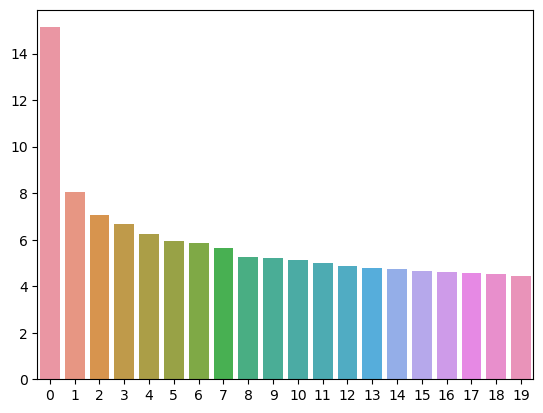

In [14]:
import seaborn as sns
sns.barplot(x=list(range(len(D))), y = D)

In [16]:
term_topic_matrix = pd.DataFrame(data=V_T, index=feature_names, columns=[f'Topic_{r}' for r in range(0, V_T.shape[1])])
term_topic_matrix

Topic_0       Topic_1       Topic_2       Topic_3  \
aa        4.489797e-03 -2.050999e-03 -2.170246e-03 -1.250162e-03   
aal       5.564672e-09  6.733563e-09  5.794104e-09  4.339868e-09   
aba       1.557972e-05 -2.205616e-05 -2.498569e-05 -1.806408e-05   
abacus    3.562518e-05 -7.718693e-05 -2.201713e-05  1.750601e-05   
abandon   1.345657e-03  1.864569e-03  3.761960e-05  8.332317e-04   
...                ...           ...           ...           ...   
zoology   5.484624e-03  2.521642e-03  3.541440e-03 -2.729265e-04   
zoom      2.229657e-03 -3.224532e-03 -1.187384e-03  7.428596e-04   
zorro     4.048340e-04 -9.296294e-04 -5.823877e-05  8.170555e-04   
zowie     3.458917e-05  2.024230e-05 -1.635266e-05 -5.110943e-05   
zucchini  1.141788e-04  3.448491e-06 -1.304045e-05  1.134478e-05   

               Topic_4       Topic_5       Topic_6       Topic_7  \
aa       -7.548072e-04  3.301953e-03  3.080347e-03 -2.397740e-03   
aal       2.957846e-08  3.054243e-08 -9.730435e-08  5.709156e-08   
aba      -7.254824e-06 -4.163429e-05 -2.013142e-06  7.804875e-07   
abacus   -6.553897e-05 -6.677993e-05 -2.474529e-05  8.689032e-06   
abandon  -2.927852e-04  8.693875e-04 -1.216379e-03  5.525583e-04   
...                ...           ...           ...           ...   
zoology   6.798704e-03  1.132223e-02 -1.373269e-02 -5.895752e-03   
zoom     -7.767808e-04 -2.813074e-03 -1.741372e-03  1.789426e-03   
zorro     3.094458e-03 -3.088740e-04  4.402478e-04 -6.590323e-04   
zowie     3.343948e-05  4.025604e-05 -1.327667e-04 -4.978621e-06   
zucchini  1.818626e-04  2.633832e-04 -1.759268e-04  7.773138e-07   

               Topic_8       Topic_9      Topic_10      Topic_11  \
aa        5.217379e-03  3.529296e-03  7.116948e-03  3.978253e-03   
aal      -3.629465e-08 -7.730634e-08 -1.450453e-08 -2.556575e-07   
aba      -7.468725e-06 -3.104087e-06  3.538102e-06 -6.088902e-06   
abacus    5.172155e-05  1.127825e-04  1.713781e-04  2.397768e-04   
abandon  -1.479581e-03 -1.081645e-03  5.872595e-04  6.559453e-04   
...                ...           ...           ...           ...   
zoology  -3.373855e-03  4.785537e-02 -1.249023e-02 -2.417507e-02   
zoom      2.754656e-03  2.583803e-03  5.181414e-03  5.564126e-03   
zorro    -1.675072e-03 -2.554204e-04 -8.135425e-04 -1.613989e-03   
zowie     2.018135e-04  1.435618e-04 -1.418432e-04 -1.201911e-04   
zucchini  1.806721e-04  1.585762e-05 -1.016872e-04 -5.989064e-05   

              Topic_12      Topic_13      Topic_14      Topic_15  \
aa       -1.460518e-03 -3.541538e-03  4.250438e-03 -2.639336e-03   
aal      -4.486391e-08 -3.608006e-07  4.366513e-07  2.001682e-07   
aba       6.582025e-05  1.978893e-05  3.133168e-06  4.383719e-05   
abacus    1.034389e-04 -1.337840e-04 -1.257112e-05 -2.737344e-04   
abandon   1.289616e-04  6.687312e-04  8.518567e-04 -1.230911e-03   
...                ...           ...           ...           ...   
zoology  -5.602784e-03 -1.939789e-04 -1.934044e-03  9.886421e-03   
zoom      1.664694e-03  1.152438e-03 -4.920152e-04 -4.745793e-03   
zorro    -2.091634e-03 -1.410009e-03  4.471458e-04 -3.585843e-03   
zowie    -1.001548e-04 -1.435116e-05 -3.316951e-05  3.539176e-06   
zucchini  1.656306e-04 -2.953436e-06  9.492744e-05  4.069199e-04   

              Topic_16      Topic_17      Topic_18      Topic_19  
aa       -6.390122e-03 -4.991667e-04  2.127877e-03 -3.154747e-03  
aal      -2.482707e-07  4.901481e-08  1.487543e-07  5.917480e-09  
aba      -1.312246e-05 -8.633487e-06  1.992447e-05  2.057864e-05  
abacus    2.644447e-05  1.927201e-04  4.331726e-05 -8.341709e-05  
abandon  -1.369482e-04 -1.044905e-03 -9.981489e-04  6.605036e-04  
...                ...           ...           ...           ...  
zoology  -3.831428e-03  8.172314e-04  7.604626e-03 -3.356777e-03  
zoom      2.424533e-04 -2.175380e-03  1.666813e-03  3.524149e-04  
zorro    -2.500666e-03  1.148346e-03 -1.176343e-03  1.884902e-03  
zowie    -1.469430e-05  1.153492e-04 -1.146377e-04 -6.177101e-05  
zucchini -

/home/olivier/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/olivier/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/olivier/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: title={'center': 'les 10 terms les plus pertinents dans le Topic 4'}>

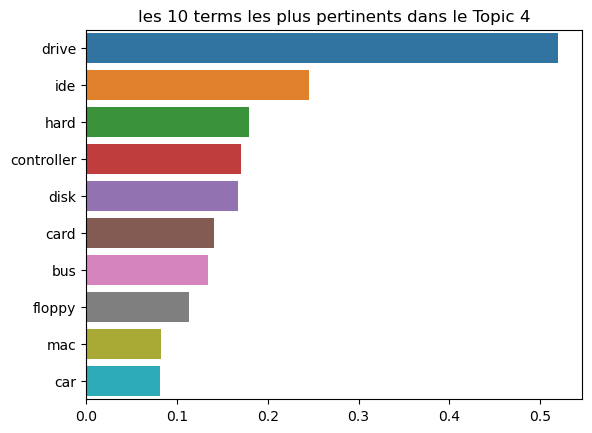

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns

data = term_topic_matrix[f'Topic_4']
data = data.sort_values(ascending=False)
top_10 = data[:10]
title='les 10 terms les plus pertinents dans le Topic 4'
plt.title(title)
sns.barplot(x= top_10.values, y=top_10.index)


# 3. LDA
## Vectorisation

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

#Bag of words
vectorizer = CountVectorizer(stop_words = 'english')
vect = vectorizer.fit_transform(corpus_lemmatized)


## Modèle  LDA

In [19]:
from sklearn.decomposition import LatentDirichletAllocation


alpha=1/20 # valeur par defaut
eta=1/20 # valeur par defaut
lda = LatentDirichletAllocation(n_components=20,doc_topic_prior=alpha,topic_word_prior=eta)
theta=lda.fit_transform(vect) #  distribution topics/document
beta=lda.components_  #  distribution mots/topics

## Evaluation  

In [20]:
# Log Likelyhood: Higher the better
print("Likelihood: ", lda.score(vect))
# Perplexity: Lower the better.
print("Perplexité: ", lda.perplexity(vect))
# visualisation des parametres du modèle
print(lda.get_params())

Likelihood:  -7657288.908536215
Perplexité:  1637.808169057953
{'batch_size': 128, 'doc_topic_prior': 0.05, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'batch', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 20, 'n_jobs': None, 'perp_tol': 0.1, 'random_state': None, 'topic_word_prior': 0.05, 'total_samples': 1000000.0, 'verbose': 0}


## Visualisation  

In [21]:
#Visualisation de la matrice theta des documents X topics

doc_topic_matrix=pd.DataFrame(data=theta, index = [f'Doc_{r}' for r in range(0,theta.shape[0])], columns = [f'Topic_{r}' for r in range(0,beta.T.shape[1])])
doc_topic_matrix


Topic_0   Topic_1   Topic_2   Topic_3   Topic_4   Topic_5  \
Doc_0      0.001220  0.001220  0.001220  0.001220  0.001220  0.001220   
Doc_1      0.429368  0.000943  0.100139  0.000943  0.000943  0.000943   
Doc_2      0.000485  0.000485  0.223251  0.125421  0.000485  0.000485   
Doc_3      0.087203  0.001163  0.033660  0.001163  0.001163  0.001163   
Doc_4      0.147582  0.000893  0.567611  0.000893  0.000893  0.000893   
...             ...       ...       ...       ...       ...       ...   
Doc_11309  0.000459  0.000459  0.000459  0.000459  0.000459  0.000459   
Doc_11310  0.325072  0.001220  0.372843  0.001220  0.001220  0.001220   
Doc_11311  0.001163  0.001163  0.115513  0.001163  0.001163  0.001163   
Doc_11312  0.000806  0.000806  0.661313  0.000806  0.000806  0.000806   
Doc_11313  0.001667  0.001667  0.001667  0.001667  0.001667  0.001667   

            Topic_6   Topic_7   Topic_8   Topic_9  Topic_10  Topic_11  \
Doc_0      0.001220  0.698520  0.001220  0.001220  0.001220  0.001220   
Doc_1      0.000943  0.372273  0.000943  0.000943  0.000943  0.000943   
Doc_2      0.000485  0.097429  0.000485  0.000485  0.000485  0.069117   
Doc_3      0.001163  0.001163  0.120734  0.001163  0.001163  0.001163   
Doc_4      0.000893  0.000893  0.000893  0.000893  0.000893  0.116608   
...             ...       ...       ...       ...       ...       ...   
Doc_11309  0.000459  0.000459  0.000459  0.000459  0.991284  0.000459   
Doc_11310  0.001220  0.001220  0.001220  0.001220  0.001220  0.001220   
Doc_11311  0.001163  0.001163  0.125890  0.066177  0.001163  0.001163   
Doc_11312  0.000806  0.000806  0.000806  0.000806  0.000806  0.000806   
Doc_11313  0.001667  0.372596  0.001667  0.001667  0.001667  0.001667   

           Topic_12  Topic_13  Topic_14  Topic_15  Topic_16  Topic_17  \
Doc_0      0.001220  0.001220  0.001220  0.001220  0.001220  0.001220   
Doc_1      0.000943  0.000943  0.083126  0.000943  0.000943  0.000943   
Doc_2      0.000485  0.000485  0.000485  0.100965  0.000485  0.000485   
Doc_3      0.001163  0.001163  0.001163  0.001163  0.001163  0.001163   
Doc_4      0.153914  0.000893  0.000893  0.000893  0.000893  0.000893   
...             ...       ...       ...       ...       ...       ...   
Doc_11309  0.000459  0.000459  0.000459  0.000459  0.000459  0.000459   
Doc_11310  0.001220  0.001220  0.001220  0.001220  0.001220  0.001220   
Doc_11311  0.001163  0.001163  0.275506  0.028993  0.001163  0.001163   
Doc_11312  0.076512  0.125770  0.000806  0.000806  0.000806  0.000806   
Doc_11313  0.001667  0.001667  0.001667  0.001667  0.001667  0.001667   

           Topic_18  Topic_19  
Doc_0      0.279529  0.001220  
Doc_1      0.000943  0.000943  
Doc_2      0.377021  0.000485  
Doc_3      0.739798  0.001163  
Doc_4      0.000893  0.000893  
...             ...       ...  
Doc_11309  0.000459  0.000459  
Doc_11310  0.281353  0.001220  
Doc_11311  0.371642  0.001163  
Doc_11312  0.123502  0.000806  
Doc_11313  0.338961  0.260110  

[11314 rows x 20 columns]

/home/olivier/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/olivier/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/olivier/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: title={'center': 'les 10 terms les plus pertinents dans le Topic 1'}>

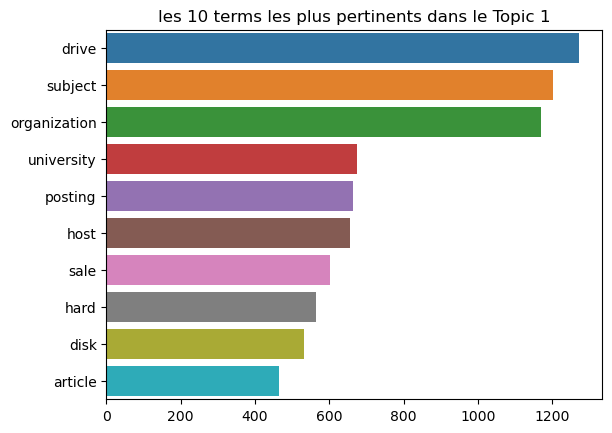

In [23]:
#affichage de la matrice beta des termes x Topics

term_topic_matrix=pd.DataFrame(data=beta.T, index = vectorizer.get_feature_names_out(), columns = [f'Topic_{r}' for r in range(0,beta.T.shape[1])])
term_topic_matrix


from matplotlib import pyplot as plt
import seaborn as sns

data = term_topic_matrix[f'Topic_0']
data = data.sort_values(ascending=False)
top_10 = data[:10]
title='les 10 terms les plus pertinents dans le Topic 1'
plt.title(title)
sns.barplot(x= top_10.values, y=top_10.index)

 # Exercice
   * Realiser une visualisation globale des differentes topics decouverts pour la LSA et la LDA

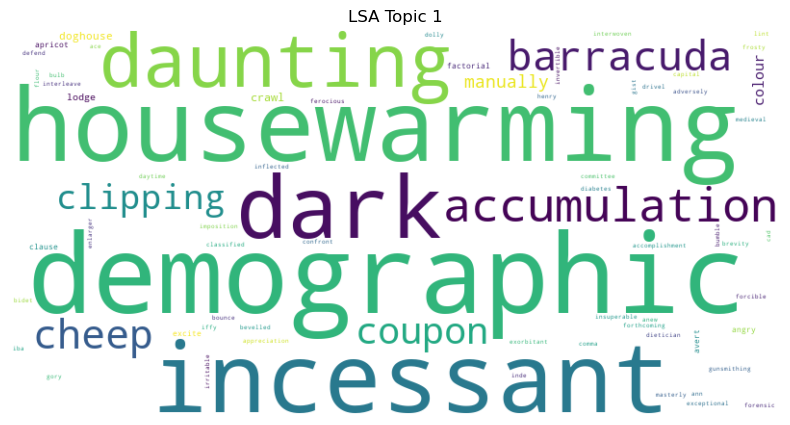

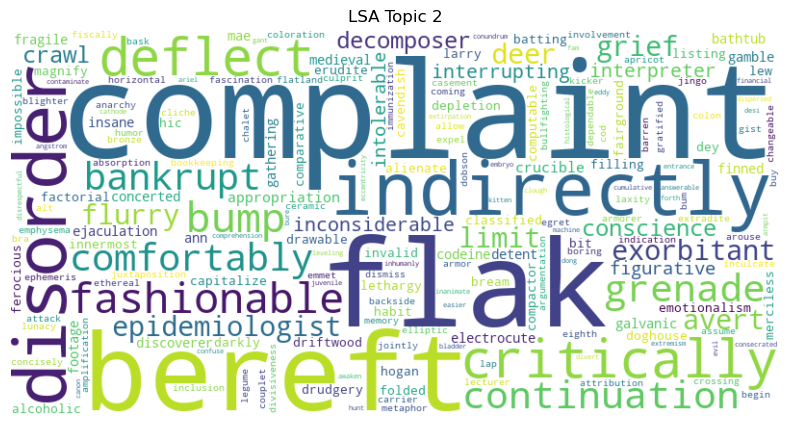

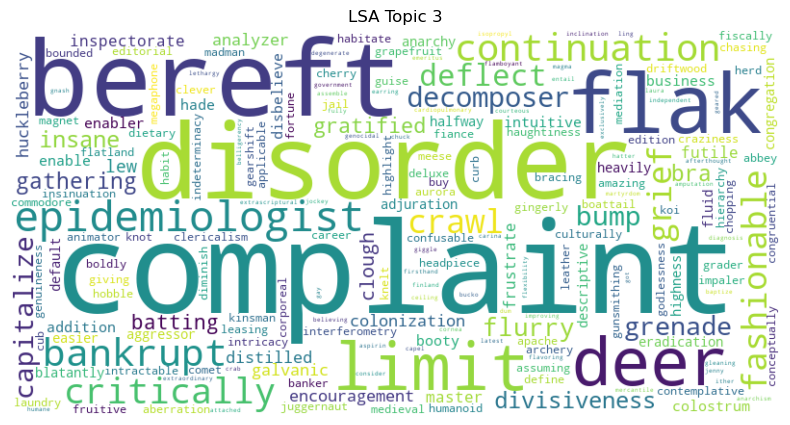

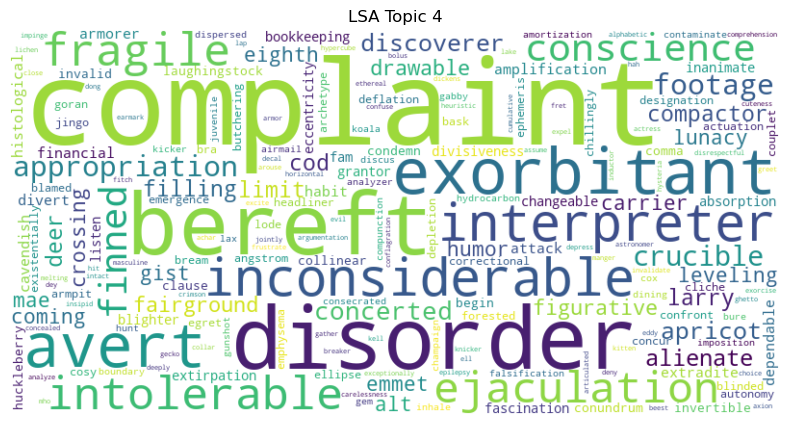

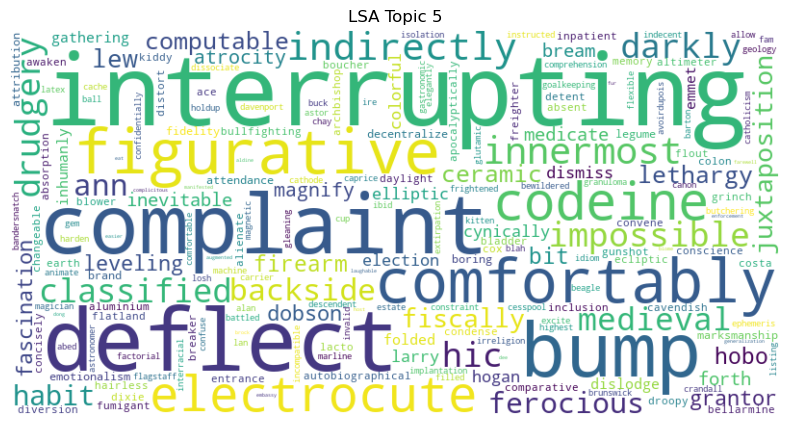

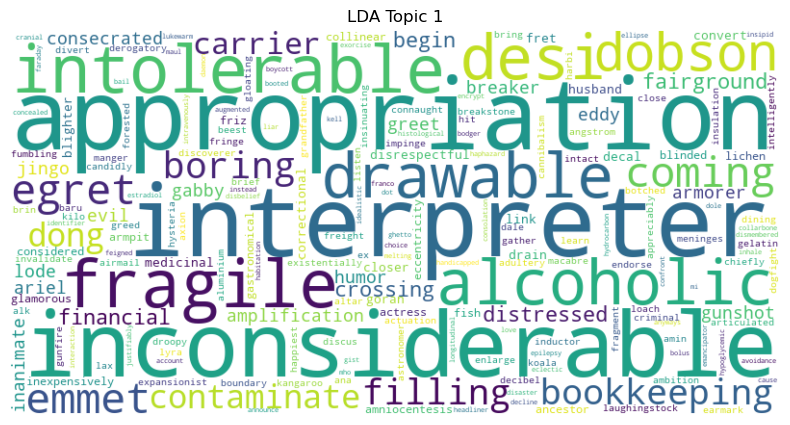

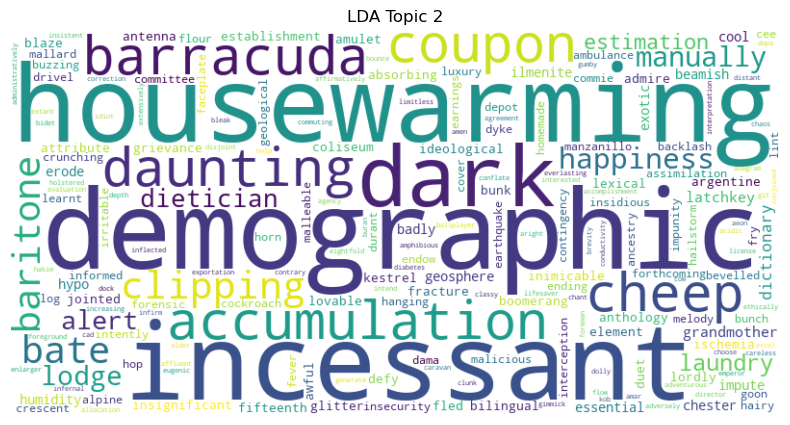

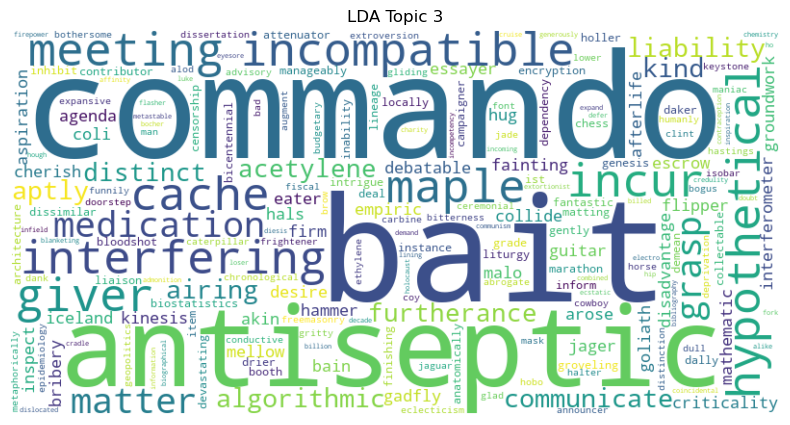

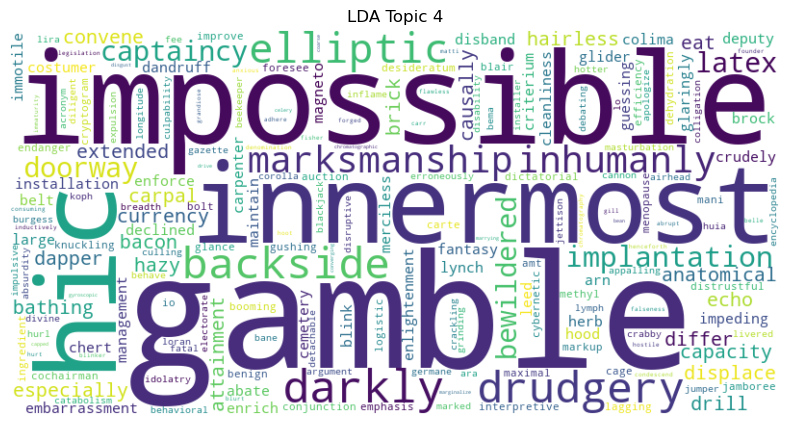

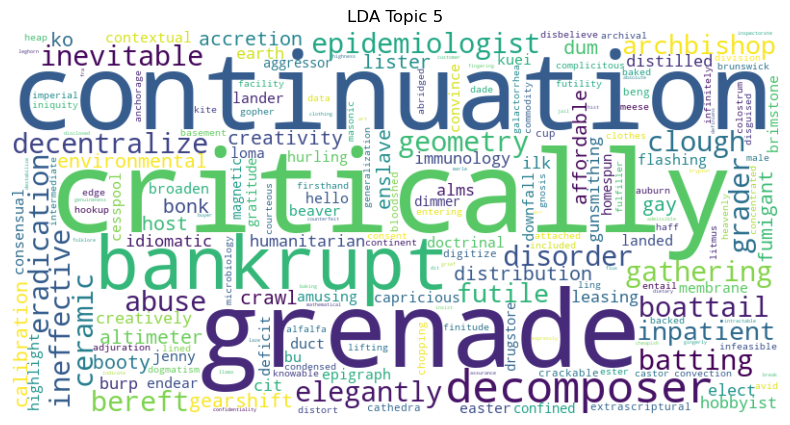

In [28]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize the corpus using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(corpus_lemmatized)

# Apply LSA
lsa_model = TruncatedSVD(n_components=5)
lsa_topic_matrix = lsa_model.fit_transform(X)

# Apply LDA
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_topic_matrix = lda_model.fit_transform(X)

# Visualize LSA topics
for i in range(len(lsa_topic_matrix.T)):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(vectorizer.get_feature_names_out(), lsa_topic_matrix.T[i])))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(f'LSA Topic {i+1}')
    plt.show()

# Visualize LDA topics
for i in range(len(lda_topic_matrix.T)):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(vectorizer.get_feature_names_out(), lda_topic_matrix.T[i])))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(f'LDA Topic {i+1}')
    plt.show()


   * Appliquer le modèle unigrame language model pour decouvrir un topic par document

In [30]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary

# Assurez-vous que corpus_lemmatized est une liste de listes de mots
corpus_lemmatized = [doc.split() for doc in corpus_lemmatized]

# Créer un dictionnaire Gensim
dictionary = Dictionary(corpus_lemmatized)
corpus_gensim = [dictionary.doc2bow(doc) for doc in corpus_lemmatized]

# Entraîner le modèle LDA
lda_gensim = LdaModel(corpus_gensim, num_topics=5, id2word=dictionary)

# Afficher les topics pour chaque document
for i, doc in enumerate(corpus_gensim):
    print(f"Document {i + 1} Topics: {lda_gensim[doc]}")

Document 1 Topics: [(3, 0.9834517)]
Document 2 Topics: [(2, 0.32446426), (3, 0.6658485)]
Document 3 Topics: [(0, 0.12288076), (1, 0.120954365), (2, 0.43776828), (3, 0.3167346)]
Document 4 Topics: [(2, 0.67197335), (3, 0.31640348)]
Document 5 Topics: [(0, 0.3863121), (2, 0.29701522), (3, 0.31009194)]
Document 6 Topics: [(1, 0.9936142)]
Document 7 Topics: [(0, 0.463563), (2, 0.51724595)]
Document 8 Topics: [(1, 0.06345657), (2, 0.93201214)]
Document 9 Topics: [(0, 0.010160654), (1, 0.010159645), (2, 0.95939124), (3, 0.010240403), (4, 0.010048057)]
Document 10 Topics: [(2, 0.99013776)]
Document 11 Topics: [(0, 0.17546748), (2, 0.059674926), (3, 0.75630337)]
Document 12 Topics: [(1, 0.8380497), (2, 0.1595044)]
Document 13 Topics: [(0, 0.01133702), (1, 0.011464813), (2, 0.5851117), (3, 0.3809127), (4, 0.011173772)]
Document 14 Topics: [(0, 0.37747985), (2, 0.030596154), (3, 0.59076554)]
Document 15 Topics: [(2, 0.4559778), (3, 0.45447078), (4, 0.08357197)]
Document 16 Topics: [(0, 0.3728542